# 《人工神经网络理论、设计及应用》代码实践-第四章 基于误差反传的多层感知器
<hr>

## 本章需要安装的第三方包及软件

```
tqdm
tensorflow
pydot
pandas
tushare
```


### 4.1.2 BP学习算法

#### 用一个学习XOR逻辑的BP网络程序，理解前向传播（推理）、反向传播（训练）的计算过程及数据间关系

Epoch: 0, Error: 0.4977550305860017
Epoch: 3000, Error: 0.335726373976126
Epoch: 6000, Error: 0.08576413241547484
Epoch: 9000, Error: 0.05537218409879135
Epoch: 12000, Error: 0.0433638658499096
Output after training
[[0.03941821]
 [0.96498873]
 [0.96492109]
 [0.03701252]]


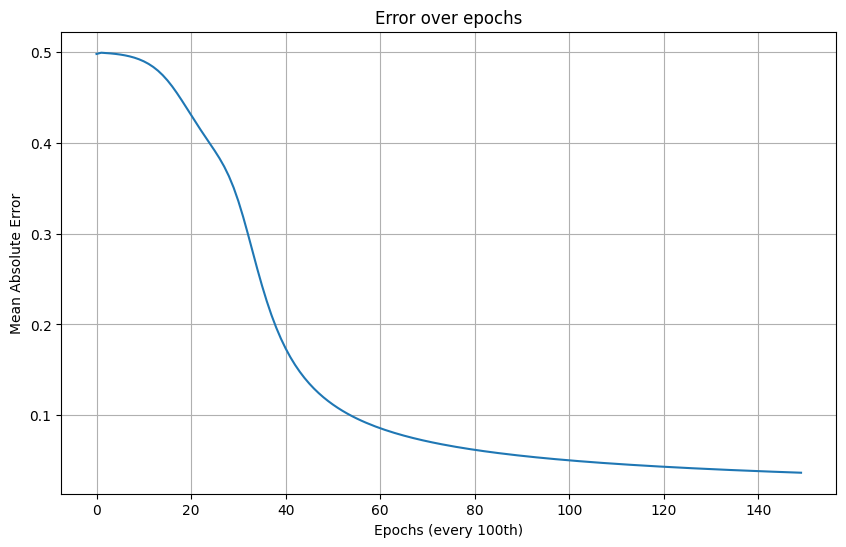

Input: [0 0], Expected Output: [0], Actual Output: [[0.0394164]]
Input: [0 1], Expected Output: [1], Actual Output: [[0.96499044]]
Input: [1 0], Expected Output: [1], Actual Output: [[0.9649228]]
Input: [1 1], Expected Output: [0], Actual Output: [[0.03701066]]


In [2]:
# 导入numpy库，用于数值计算，并将其别名设置为np
import numpy as np
# 导入matplotlib库，用于绘制误差下降曲线，并将其命名设置为plt
import matplotlib.pyplot as plt

# Sigmoid激活函数及其导数
def sigmoid(x):
    # 定义sigmoid函数，它是一个S形曲线函数，用于将值映射到0和1之间
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # 定义sigmoid函数的导数，用于在反向传播时计算梯度
    return x * (1 - x)

# XOR输入数据
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
# 创建一个numpy数组表示XOR逻辑运算的输入数据集

# XOR输出数据
y = np.array([[0], 
              [1], 
              [1], 
              [0]])
# 创建一个numpy数组表示对应于上述输入的期望输出（XOR结果）

# 设置随机数生成器种子以获得可重复的结果
np.random.seed(42)
# 使用固定的种子初始化随机数生成器，以便每次运行代码时得到相同的结果

# 随机初始化权重，均值为0
input_layer_neurons = X.shape[1] # 输入层神经元数量等于数据集中特征的数量
hidden_layer_neurons = 2 # 隐藏层神经元数量设定为2
output_neurons = 1 # 输出层神经元数量设定为1

# 初始化隐藏层的权重和偏置
wh = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
bh = np.random.uniform(size=(1, hidden_layer_neurons))
# wh是连接输入层和隐藏层的权重矩阵，bh是隐藏层的偏置向量

# 初始化输出层的权重和偏置
wout = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))
# wout是连接隐藏层和输出层的权重矩阵，bout是输出层的偏置向量

# 训练过程
epochs = 15000 # 迭代次数（训练周期）
lr = 0.1 # 学习率，控制更新权重的步长大小
# 创建一个列表来保存每个周期的误差
errors = []

for epoch in range(epochs):
    # 前向传播
    hidden_layer_input1 = np.dot(X, wh)
    # 计算从输入层到隐藏层的输入（不包括偏置）
    
    hidden_layer_input = hidden_layer_input1 + bh
    # 加上偏置后，得到完整的隐藏层输入
    
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    # 应用激活函数sigmoid到隐藏层输入，得到隐藏层激活值
    
    output_layer_input1 = np.dot(hiddenlayer_activations, wout)
    # 计算从隐藏层到输出层的输入（不包括偏置）
    
    output_layer_input = output_layer_input1 + bout
    # 加上偏置后，得到完整的输出层输入
    
    output = sigmoid(output_layer_input)
    # 应用激活函数sigmoid到输出层输入，得到最终输出

    # 反向传播
    # ------------------------输出层处理---------------------------
    # 计算输出层的误差
    E = y - output
    # 误差E是期望输出y与实际输出之间的差异
    
    # 计算输出层的斜率
    slope_output_layer = sigmoid_derivative(output)
    # 输出层的斜率，即输出层激活值对输出层输入的导数
    
    # 计算输出层的误差项
    d_output = E * slope_output_layer
    # 误差项d_output是误差E乘以输出层的斜率

    # ------------------------隐藏层处理---------------------------
    # 计算隐藏层的误差
    Error_at_hidden_layer = d_output.dot(wout.T)
    
    # 计算隐藏层的斜率
    slope_hidden_layer = sigmoid_derivative(hiddenlayer_activations)
    # 隐藏层的斜率，即隐藏层激活值对隐藏层输入的导数
    
    # 将输出层的误差通过权重反馈给隐藏层
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer    
    # 隐藏层的误差项是隐藏层的误差乘以其斜率

    # ------------------------各层权重及偏置更新---------------------------
    # 更新权重和偏置
    wout += hiddenlayer_activations.T.dot(d_output) * lr
    # 根据学习率和误差调整输出层的权重
    bout += np.sum(d_output, axis=0, keepdims=True) * lr
    # 根据学习率和误差调整输出层的偏置
    wh += X.T.dot(d_hiddenlayer) * lr
    # 根据学习率和误差调整隐藏层的权重
    bh += np.sum(d_hiddenlayer, axis=0, keepdims=True) * lr
    # 根据学习率和误差调整隐藏层的偏置

    # ------------------------误差变化记录---------------------------
    if epoch % 100 == 0:
        errors.append(np.mean(np.abs(E)))  # 每100个周期保存一次误差
    if epoch % 3000 == 0:
        print(f'Epoch: {epoch}, Error: {np.mean(np.abs(E))}')
        # 每3000个周期打印一次当前周期数和平均绝对误差

print("Output after training")
print(output)
# 打印训练后的网络输出

# 绘制误差下降曲线
plt.figure(figsize=(10, 6))
plt.plot(errors)
plt.title('Error over epochs')
plt.xlabel('Epochs (every 100th)')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()

# 测试网络在XOR问题上的表现
for i in range(len(X)):
    hidden_layer_result1 = np.dot([X[i]], wh)
    # 对单个输入进行前向传播，计算从输入层到隐藏层的输入（不包括偏置）
    
    hidden_layer_result = hidden_layer_result1 + bh
    # 加上偏置后，得到完整的隐藏层输入
    
    hiddenlayer_activations = sigmoid(hidden_layer_result)
    # 应用激活函数sigmoid到隐藏层输入，得到隐藏层激活值
    
    output_layer_result1 = np.dot(hiddenlayer_activations, wout)
    # 计算从隐藏层到输出层的输入（不包括偏置）
    
    output_layer_result = output_layer_result1 + bout
    # 加上偏置后，得到完整的输出层输入
    
    output = sigmoid(output_layer_result)
    # 应用激活函数sigmoid到输出层输入，得到最终输出
    
    print(f"Input: {X[i]}, Expected Output: {y[i]}, Actual Output: {output}")
    # 打印每个输入对应的预期输出和实际输出

#### 上面程序的面向对象方式实现

Epoch: 0, Error: 0.4977550305860017
Epoch: 3000, Error: 0.335726373976126
Epoch: 6000, Error: 0.08576413241547484
Epoch: 9000, Error: 0.05537218409879135
Epoch: 12000, Error: 0.0433638658499096
Output after training
[[0.0394164 ]
 [0.96499044]
 [0.9649228 ]
 [0.03701066]]


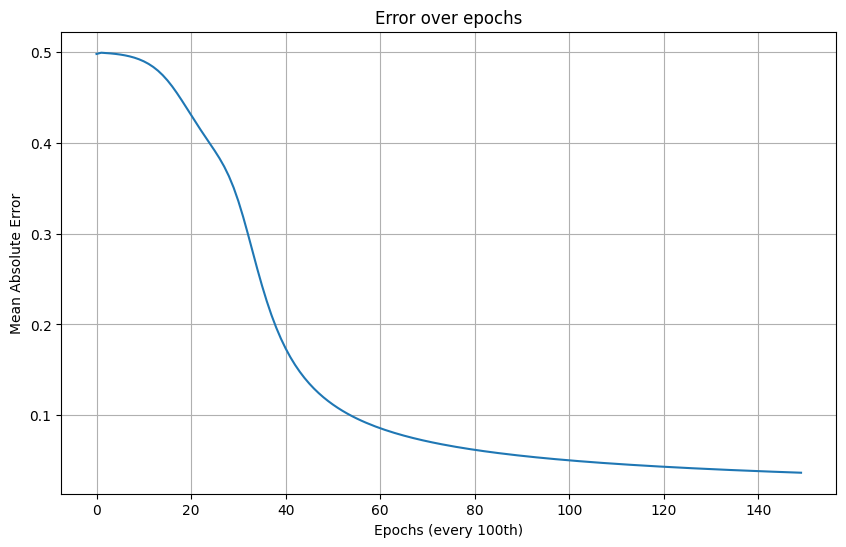

Input: [0 0], Expected Output: [0], Actual Output: [[0.0394164]]
Input: [0 1], Expected Output: [1], Actual Output: [[0.96499044]]
Input: [1 0], Expected Output: [1], Actual Output: [[0.9649228]]
Input: [1 1], Expected Output: [0], Actual Output: [[0.03701066]]


In [3]:
# 上面处理XOR逻辑BP程序的面向对象方式实现

import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_layer_neurons, hidden_layer_neurons, output_neurons):
        # 初始化权重和偏置
        self.wh = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
        self.bh = np.random.uniform(size=(1, hidden_layer_neurons))
        self.wout = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
        self.bout = np.random.uniform(size=(1, output_neurons))

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)

    def forward(self, X):
        # 前向传播
        self.hidden_layer_input1 = np.dot(X, self.wh)
        self.hidden_layer_input = self.hidden_layer_input1 + self.bh
        self.hiddenlayer_activations = self.sigmoid(self.hidden_layer_input)
        
        self.output_layer_input1 = np.dot(self.hiddenlayer_activations, self.wout)
        self.output_layer_input = self.output_layer_input1 + self.bout
        self.output = self.sigmoid(self.output_layer_input)
        return self.output

    def backward(self, X, y, lr):
        # 反向传播
        E = y - self.output
        d_output = E * self.sigmoid_derivative(self.output)
        Error_at_hidden_layer = d_output.dot(self.wout.T)
        d_hiddenlayer = Error_at_hidden_layer * self.sigmoid_derivative(self.hiddenlayer_activations)

        # 更新权重和偏置
        # 更新输出层
        self.wout += self.hiddenlayer_activations.T.dot(d_output) * lr
        self.bout += np.sum(d_output, axis=0, keepdims=True) * lr
        # 更新隐层
        self.wh += X.T.dot(d_hiddenlayer) * lr
        self.bh += np.sum(d_hiddenlayer, axis=0, keepdims=True) * lr
        return np.mean(np.abs(E))

    def train(self, X, y, epochs, lr):
        errors = []
        for epoch in range(epochs):
            self.forward(X)
            error = self.backward(X, y, lr)

            if epoch % 100 == 0:
                errors.append(error)
            if epoch % 3000 == 0:
                print(f'Epoch: {epoch}, Error: {error}')

        return errors

    def test(self, X):
        return self.forward(X)


# XOR输入数据
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# XOR输出数据
y = np.array([[0], 
              [1], 
              [1], 
              [0]])

# 设置随机数生成器种子以获得可重复的结果
np.random.seed(42)

# 创建神经网络实例
nn = NeuralNetwork(input_layer_neurons=X.shape[1], hidden_layer_neurons=2, output_neurons=1)

# 训练神经网络
errors = nn.train(X, y, epochs=15000, lr=0.1)

print("Output after training")
print(nn.test(X))

# 绘制误差下降曲线
plt.figure(figsize=(10, 6))
plt.plot(errors)
plt.title('Error over epochs')
plt.xlabel('Epochs (every 100th)')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()

# 测试网络在XOR问题上的表现
for i in range(len(X)):
    output = nn.test([X[i]])
    print(f"Input: {X[i]}, Expected Output: {y[i]}, Actual Output: {output}")

#### 书中代码-Page63 4.3.2.1基于Python的BP算法实现

In [4]:
# Page63 4.3.2.1面向过程的BP算法程序实现
from math import exp
from random import seed, random

# 初始化网络
def initialize_network(n_inputs, n_hidden, n_outputs):
    """
    初始化神经网络的权重和偏置。
    
    参数:
    n_inputs -- 输入层的神经元数量
    n_hidden -- 隐藏层的神经元数量
    n_outputs -- 输出层的神经元数量
    
    返回:
    network -- 初始化后的神经网络
    """
    network = list()
    # 隐藏层，每个神经元有 n_inputs + 1 个权重（包括偏置）
    hidden_layer = [{'weights': [random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    # 输出层，每个神经元有 n_hidden + 1 个权重（包括偏置）
    output_layer = [{'weights': [random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

# 计算神经元的激活值
def activate(weights, inputs):
    """
    计算神经元的激活值。
    
    参数:
    weights -- 权重列表（包括偏置）
    inputs -- 输入列表
    
    返回:
    activation -- 激活值
    """
    activation = weights[-1]  # 偏置
    for i in range(len(weights) - 1):
        activation += weights[i] * inputs[i]  # 权重和输入的点积
    return activation

# 激活函数（Sigmoid）
def transfer(activation):
    """
    使用Sigmoid激活函数。
    
    参数:
    activation -- 激活值
    
    返回:
    output -- 激活后的输出
    """
    return 1.0 / (1.0 + exp(-activation))

# 前向传播
def forward_propagate(network, row):
    """
    前向传播计算网络的输出。
    
    参数:
    network -- 神经网络
    row -- 输入数据行
    
    返回:
    inputs -- 最终的输出层激活值
    """
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# 激活函数的导数
def transfer_derivative(output):
    """
    计算Sigmoid激活函数的导数。
    
    参数:
    output -- 激活后的输出
    
    返回:
    derivative -- 导数值
    """
    return output * (1.0 - output)

# 反向传播误差
def backward_propagate_error(network, expected):
    """
    反向传播误差，计算每个神经元的误差项。
    
    参数:
    network -- 神经网络
    expected -- 期望输出
    """
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network) - 1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# 更新权重
def update_weights(network, row, l_rate):
    """
    更新网络的权重。
    
    参数:
    network -- 神经网络
    row -- 输入数据行
    l_rate -- 学习率
    """
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

# 训练网络
def train_network(network, train, l_rate, n_epoch, n_outputs):
    """
    训练神经网络。
    
    参数:
    network -- 神经网络
    train -- 训练数据集
    l_rate -- 学习率
    n_epoch -- 迭代次数
    n_outputs -- 输出层神经元数量
    """
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

# 预测
def predict(network, row):
    """
    使用训练好的网络进行预测。
    
    参数:
    network -- 神经网络
    row -- 输入数据行
    
    返回:
    index -- 预测的类别索引
    """
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

# 测试代码
seed(1)
dataset=[[2.7810836,2.550537003,0],
        [1.465489372,2.362125076,0],
        [3.396561688,4.400293529,0],
        [1.38807019,1.850220317,0],
        [3.06407232,3.005305973,0],
        [7.627531214,2.759262235,1],
        [5.332441248,2.088626775,1],
        [6.922596716,1.77106367,1],
        [8.675418651,-0.242068655,1],
        [7.673756466,3.508563011,1]]
n_inputs=len(dataset[0])-1
n_outputs=len(set([row[-1] for row in dataset]))
network=initialize_network(n_inputs,2,n_outputs)
train_network(network,dataset,0.5,20,n_outputs)
for layer in network:
    print(layer)
for row in dataset:
    prediction=predict(network,row)
    print('Expected=%d,Got=%d' % (row[-1],prediction))


>epoch=0, lrate=0.500, error=6.350
>epoch=1, lrate=0.500, error=5.531
>epoch=2, lrate=0.500, error=5.221
>epoch=3, lrate=0.500, error=4.951
>epoch=4, lrate=0.500, error=4.519
>epoch=5, lrate=0.500, error=4.173
>epoch=6, lrate=0.500, error=3.835
>epoch=7, lrate=0.500, error=3.506
>epoch=8, lrate=0.500, error=3.192
>epoch=9, lrate=0.500, error=2.898
>epoch=10, lrate=0.500, error=2.626
>epoch=11, lrate=0.500, error=2.377
>epoch=12, lrate=0.500, error=2.153
>epoch=13, lrate=0.500, error=1.953
>epoch=14, lrate=0.500, error=1.774
>epoch=15, lrate=0.500, error=1.614
>epoch=16, lrate=0.500, error=1.472
>epoch=17, lrate=0.500, error=1.346
>epoch=18, lrate=0.500, error=1.233
>epoch=19, lrate=0.500, error=1.132
[{'weights': [-1.4688375095432327, 1.850887325439514, 1.0858178629550297], 'output': 0.029980305604426185, 'delta': -0.0059546604162323625}, {'weights': [0.37711098142462157, -0.0625909894552989, 0.2765123702642716], 'output': 0.9456229000211323, 'delta': 0.0026279652850863837}]
[{'weights

In [ ]:
# 延展代码-示例用法
if __name__ == "__main__":
    # 设置随机种子以确保结果的可重复性
    seed(1)
    
    # 初始化网络
    n_inputs = 2
    n_hidden = 2
    n_outputs = 2
    network = initialize_network(n_inputs, n_hidden, n_outputs)
    
    # 训练数据集
    dataset = [
        [2.7810836, 2.550537003, 0],
        [1.465489372, 2.362125076, 0],
        [3.396561688, 4.400293529, 0],
        [1.38807019, 1.850220317, 0],
        [3.06407232, 3.005305973, 0],
        [7.627531214, 2.759262235, 1],
        [5.332441248, 2.088626775, 1],
        [6.922596716, 1.77106367, 1],
        [8.675418651, -0.242068655, 1],
        [7.673756466, 3.508563011, 1]
    ]
    
    # 训练网络
    l_rate = 0.5
    n_epoch = 2000
    train_network(network, dataset, l_rate, n_epoch, n_outputs)
    
    # 预测
    for row in dataset:
        prediction = predict(network, row)
        print('Expected=%d, Got=%d' % (row[-1], prediction))

#### “书中代码”-Page68 基于面向对象的BP算法实现（根据书中缩略描述的名称、结构创建，非原书中代码）

In [ ]:
# Page68 基于面向对象的BP算法实现

import numpy as np
from scipy.stats import truncnorm

class NeuralNetwork:
    def __init__(self, n_inputs, n_hidden, n_outputs):
        """
        初始化神经网络。
        
        参数:
        n_inputs -- 输入层的神经元数量
        n_hidden -- 隐藏层的神经元数量
        n_outputs -- 输出层的神经元数量
        """
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.network = self.initialize_network()

    def initialize_network(self):
        """
        使用Truncated Normal分布初始化网络的权重和偏置。
        
        返回:
        network -- 初始化后的神经网络
        """
        network = list()
        # 隐藏层，每个神经元有 n_inputs + 1 个权重（包括偏置）
        hidden_layer = [{'weights': self.truncated_normal(mean=0, sd=1, low=-0.5, upp=0.5, size=self.n_inputs + 1)} for _ in range(self.n_hidden)]
        network.append(hidden_layer)
        # 输出层，每个神经元有 n_hidden + 1 个权重（包括偏置）
        output_layer = [{'weights': self.truncated_normal(mean=0, sd=1, low=-0.5, upp=0.5, size=self.n_hidden + 1)} for _ in range(self.n_outputs)]
        network.append(output_layer)
        return network

    @staticmethod
    def truncated_normal(mean=0, sd=1, low=0, upp=10, size=None):
        """
        生成Truncated Normal分布的随机数。
        
        参数:
        mean -- 均值
        sd -- 标准差
        low -- 下限
        upp -- 上限
        size -- 生成数组的形状
        
        返回:
        截断正态分布的随机数
        """
        return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd).rvs(size)

    @staticmethod
    def activate(weights, inputs):
        """
        计算神经元的激活值。
        
        参数:
        weights -- 权重列表（包括偏置）
        inputs -- 输入列表
        
        返回:
        activation -- 激活值
        """
        activation = weights[-1]  # 偏置
        for i in range(len(weights) - 1):
            activation += weights[i] * inputs[i]  # 权重和输入的点积
        return activation

    @staticmethod
    def transfer(activation):
        """
        使用Sigmoid激活函数。
        
        参数:
        activation -- 激活值
        
        返回:
        output -- 激活后的输出
        """
        return 1.0 / (1.0 + np.exp(-activation))

    def forward_propagate(self, row):
        """
        前向传播计算网络的输出。
        
        参数:
        row -- 输入数据行
        
        返回:
        inputs -- 最终的输出层激活值
        """
        inputs = row
        for layer in self.network:
            new_inputs = []
            for neuron in layer:
                activation = self.activate(neuron['weights'], inputs)
                neuron['output'] = self.transfer(activation)
                new_inputs.append(neuron['output'])
            inputs = new_inputs
        return inputs

    @staticmethod
    def transfer_derivative(output):
        """
        计算Sigmoid激活函数的导数。
        
        参数:
        output -- 激活后的输出
        
        返回:
        derivative -- 导数值
        """
        return output * (1.0 - output)

    def backward_propagate_error(self, expected):
        """
        反向传播误差，计算每个神经元的误差项。
        
        参数:
        expected -- 期望输出
        """
        for i in reversed(range(len(self.network))):
            layer = self.network[i]
            errors = list()
            if i != len(self.network) - 1:
                for j in range(len(layer)):
                    error = 0.0
                    for neuron in self.network[i + 1]:
                        error += (neuron['weights'][j] * neuron['delta'])
                    errors.append(error)
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    errors.append(expected[j] - neuron['output'])
            for j in range(len(layer)):
                neuron = layer[j]
                neuron['delta'] = errors[j] * self.transfer_derivative(neuron['output'])

    def update_weights(self, row, l_rate):
        """
        更新网络的权重。
        
        参数:
        row -- 输入数据行
        l_rate -- 学习率
        """
        for i in range(len(self.network)):
            inputs = row[:-1]
            if i != 0:
                inputs = [neuron['output'] for neuron in self.network[i - 1]]
            for neuron in self.network[i]:
                for j in range(len(inputs)):
                    neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
                neuron['weights'][-1] += l_rate * neuron['delta']

    def train(self, train, l_rate, n_epoch):
        """
        训练神经网络。
        
        参数:
        train -- 训练数据集
        l_rate -- 学习率
        n_epoch -- 迭代次数
        """
        for epoch in range(n_epoch):
            sum_error = 0
            for row in train:
                outputs = self.forward_propagate(row)
                expected = [0 for _ in range(self.n_outputs)]
                expected[row[-1]] = 1
                sum_error += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
                self.backward_propagate_error(expected)
                self.update_weights(row, l_rate)
            print(f'>epoch={epoch}, lrate={l_rate:.3f}, error={sum_error:.3f}')

    def predict(self, row):
        """
        使用训练好的网络进行预测。
        
        参数:
        row -- 输入数据行
        
        返回:
        index -- 预测的类别索引
        """
        outputs = self.forward_propagate(row)
        return outputs.index(max(outputs))


# 示例用法

# 设置随机种子以确保结果的可重复性
np.random.seed(1)

# 初始化网络
n_inputs = 2
n_hidden = 2
n_outputs = 2
network = NeuralNetwork(n_inputs, n_hidden, n_outputs)

# 训练数据集
dataset=[[2.7810836,2.550537003,0],
        [1.465489372,2.362125076,0],
        [3.396561688,4.400293529,0],
        [1.38807019,1.850220317,0],
        [3.06407232,3.005305973,0],
        [7.627531214,2.759262235,1],
        [5.332441248,2.088626775,1],
        [6.922596716,1.77106367,1],
        [8.675418651,-0.242068655,1],
        [7.673756466,3.508563011,1]]
# 训练网络
l_rate = 0.5
n_epoch = 2000
network.train(dataset, l_rate, n_epoch)

# 预测
for row in dataset:
    prediction = network.predict(row)
    print(f'Expected={row[-1]}, Got={prediction}')

#### 书中代码-Page69 基于Scikit-learn包的网络实现

In [7]:
# Page69 基于Scikit-learn包的网络实现

from sklearn.neural_network import MLPClassifier

# 定义输入数据 X 和标签 y
X = [[0., 0., 1], [1., 1., 2]]
y = [[0, 1], [1, 1]]

# 创建 MLPClassifier 模型
# solver: 优化算法，这里使用 'lbfgs'
# alpha: L2正则化参数
# hidden_layer_sizes: 隐藏层的结构，这里是一个包含15个神经元的隐藏层
# random_state: 随机种子，确保结果的可重复性
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

# 训练模型
clf.fit(X, y)

# 预测新的输入数据
print(clf.predict([[1., 2., 2]]))
print(clf.predict([[0., 0., 0]]))

# 查看每层权重矩阵的形状
print([coef.shape for coef in clf.coefs_])

[[1 1]]
[[0 1]]
[(3, 15), (15, 2)]


### 4.4 BP算法的改进

#### Page70 4.4 BP算法的改进，以解决XOR问题为例

Training: 100%|█████████████████████████████████████████████████████████████████████| 65000/65000 [00:04<00:00, 15342.38epoch/s]


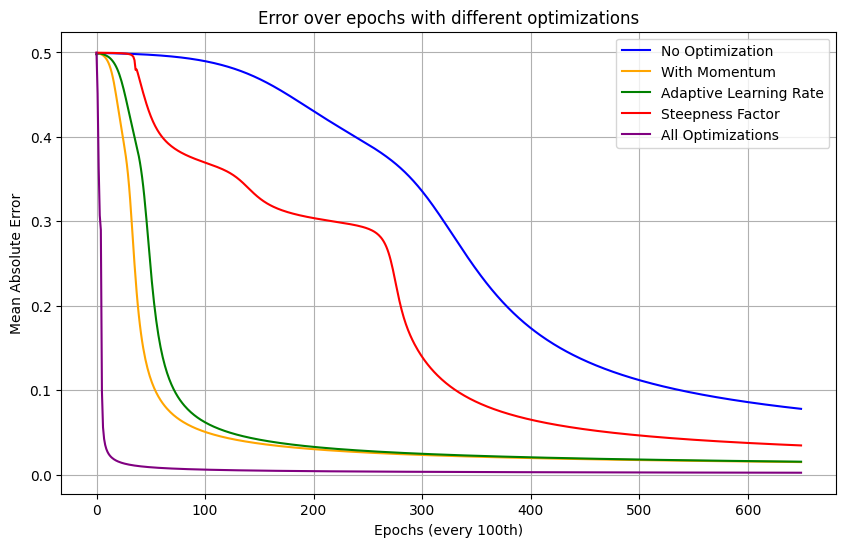

In [8]:
# 可选动量项、自适应调节学习率、引入陡度因子，误差下降可视化比较
# 可以尝试设置不同的初始学习率，例如0.6、0.1、0.01，假想未知问题在采取激进或保守参数时，网络误差收敛情况。

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

class XORNeuralNetwork:
    def __init__(self, use_momentum=False, adaptive_lr=False, steepness_factor=1.0):
        self.use_momentum = use_momentum
        self.adaptive_lr = adaptive_lr
        self.steepness_factor = steepness_factor  # 引入陡度因子
        self.input_layer_neurons = 2
        self.hidden_layer_neurons = 2
        self.output_neurons = 1
        
        self.initialize_weights()

    def initialize_weights(self):
        np.random.seed(42)  # 确保每次运行时初始化相同的随机数
        self.wh = np.random.uniform(size=(self.input_layer_neurons, self.hidden_layer_neurons))
        self.bh = np.random.uniform(size=(1, self.hidden_layer_neurons))
        self.wout = np.random.uniform(size=(self.hidden_layer_neurons, self.output_neurons))
        self.bout = np.random.uniform(size=(1, self.output_neurons))

        self.velocity_wh = np.zeros_like(self.wh)
        self.velocity_bh = np.zeros_like(self.bh)
        self.velocity_wout = np.zeros_like(self.wout)
        self.velocity_bout = np.zeros_like(self.bout)

        self.lr = 0.01  # 初始学习率 例如：0.6、0.1、0.01
        self.momentum = 0.9 if self.use_momentum else 0

    @staticmethod
    def sigmoid(x, steepness=1.0):
        return 1 / (1 + np.exp(-steepness * x))

    @staticmethod
    def sigmoid_derivative(x, steepness=1.0):
        sig = XORNeuralNetwork.sigmoid(x, steepness)
        return sig * (1 - sig)

    def adapt_learning_rate(self, error):
        if self.adaptive_lr:
            # 根据误差调整学习率，这里简单地根据误差大小调整
            self.lr = max(0.01, min(0.5, 0.1 / (1 + abs(error))))
    def train(self, X, y, epochs=65000):
        errors = []

        # 使用tqdm包装range以创建进度条
        for epoch in tqdm(range(epochs), desc='Training', unit='epoch'):
            # 前向传播
            hidden_layer_input1 = np.dot(X, self.wh)
            hidden_layer_input = hidden_layer_input1 + self.bh
            hiddenlayer_activations = self.sigmoid(hidden_layer_input, self.steepness_factor)
            
            output_layer_input1 = np.dot(hiddenlayer_activations, self.wout)
            output_layer_input = output_layer_input1 + self.bout
            output = self.sigmoid(output_layer_input, self.steepness_factor)

            # 反向传播
            E = y - output
            slope_output_layer = self.sigmoid_derivative(output_layer_input, self.steepness_factor)
            d_output = E * slope_output_layer
            
            Error_at_hidden_layer = d_output.dot(self.wout.T)
            slope_hidden_layer = self.sigmoid_derivative(hidden_layer_input, self.steepness_factor)
            d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer

            # 更新速度变量，并根据动量更新权重和偏置
            self.velocity_wh = self.momentum * self.velocity_wh + self.lr * X.T.dot(d_hiddenlayer)
            self.velocity_bh = self.momentum * self.velocity_bh + self.lr * np.sum(d_hiddenlayer, axis=0, keepdims=True)
            self.velocity_wout = self.momentum * self.velocity_wout + self.lr * hiddenlayer_activations.T.dot(d_output)
            self.velocity_bout = self.momentum * self.velocity_bout + self.lr * np.sum(d_output, axis=0, keepdims=True)

            self.wh += self.velocity_wh
            self.bh += self.velocity_bh
            self.wout += self.velocity_wout
            self.bout += self.velocity_bout

            # 自适应调节学习率
            avg_error = np.mean(np.abs(E))
            self.adapt_learning_rate(avg_error)

            if epoch % 100 == 0:
                errors.append(avg_error)

        return errors

# 定义输入数据
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# 创建五个对象分别用于不同配置的训练
xor_nn_no_opt = XORNeuralNetwork()
xor_nn_with_momentum = XORNeuralNetwork(use_momentum=True)
xor_nn_adaptive_lr = XORNeuralNetwork(adaptive_lr=True)
xor_nn_steepness = XORNeuralNetwork(steepness_factor=5.0)  # 设置较大的陡度因子
xor_nn_all_opts = XORNeuralNetwork(use_momentum=True, adaptive_lr=True, steepness_factor=5.0)

# 训练并记录误差下降情况
errors_no_opt = xor_nn_no_opt.train(X, y)
errors_with_momentum = xor_nn_with_momentum.train(X, y)
errors_adaptive_lr = xor_nn_adaptive_lr.train(X, y)
errors_steepness = xor_nn_steepness.train(X, y)
errors_all_opts = xor_nn_all_opts.train(X, y)

# 绘制误差下降曲线在同一张图表上
plt.figure(figsize=(10, 6))

plt.plot(errors_no_opt, label='No Optimization', color='blue')
plt.plot(errors_with_momentum, label='With Momentum', color='orange')
plt.plot(errors_adaptive_lr, label='Adaptive Learning Rate', color='green')
plt.plot(errors_steepness, label='Steepness Factor', color='red')
plt.plot(errors_all_opts, label='All Optimizations', color='purple')

plt.title('Error over epochs with different optimizations')
plt.xlabel('Epochs (every 100th)')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.show()

#### 通过全部训练期望时自动停止训练

Training:  44%|██████████████████████████████▋                                      | 28886/65000 [00:02<00:02, 13904.76epoch/s]


All predictions match the targets at epoch 28886. Stopping training.


Training:   5%|███▏                                                                  | 2930/65000 [00:00<00:05, 12393.38epoch/s]


All predictions match the targets at epoch 2930. Stopping training.


Training:   6%|████▌                                                                 | 4204/65000 [00:00<00:05, 11578.80epoch/s]


All predictions match the targets at epoch 4204. Stopping training.


Training:  37%|█████████████████████████▎                                           | 23891/65000 [00:01<00:02, 13877.05epoch/s]


All predictions match the targets at epoch 23891. Stopping training.


Training:   1%|▍                                                                      | 384/65000 [00:00<00:05, 12490.60epoch/s]


All predictions match the targets at epoch 384. Stopping training.


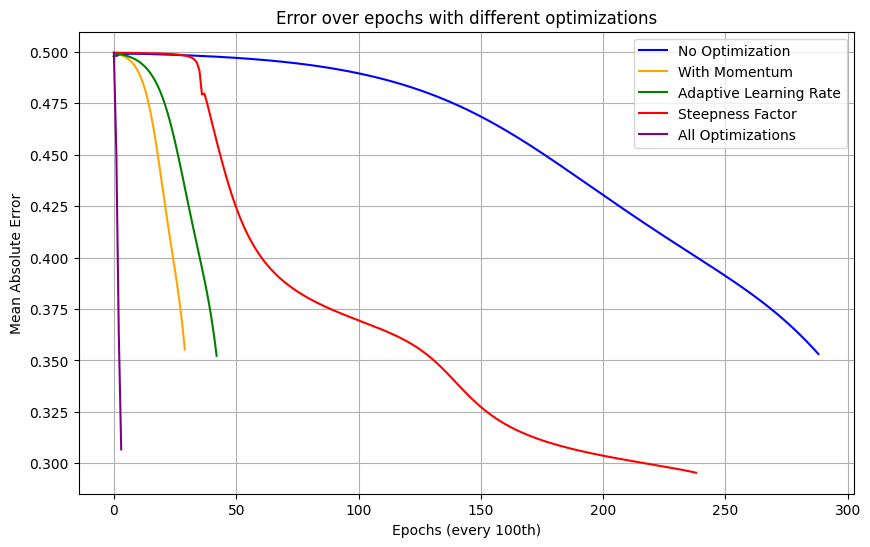

In [9]:
# 增加通过全部训练期望时自动停止功能，可以看到程序不再追求误差的无限减小，而是根据是否满足全部期望，决定是否终止训练。

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

class XORNeuralNetwork:
    def __init__(self, use_momentum=False, adaptive_lr=False, steepness_factor=1.0):
        self.use_momentum = use_momentum
        self.adaptive_lr = adaptive_lr
        self.steepness_factor = steepness_factor  # 引入陡度因子
        self.input_layer_neurons = 2
        self.hidden_layer_neurons = 2
        self.output_neurons = 1
        
        self.initialize_weights()

    def initialize_weights(self):
        np.random.seed(42)  # 确保每次运行时初始化相同的随机数
        self.wh = np.random.uniform(size=(self.input_layer_neurons, self.hidden_layer_neurons))
        self.bh = np.random.uniform(size=(1, self.hidden_layer_neurons))
        self.wout = np.random.uniform(size=(self.hidden_layer_neurons, self.output_neurons))
        self.bout = np.random.uniform(size=(1, self.output_neurons))

        self.velocity_wh = np.zeros_like(self.wh)
        self.velocity_bh = np.zeros_like(self.bh)
        self.velocity_wout = np.zeros_like(self.wout)
        self.velocity_bout = np.zeros_like(self.bout)

        self.lr = 0.01  # 初始学习率 例如：0.6、0.1、0.01
        self.momentum = 0.9 if self.use_momentum else 0

    @staticmethod
    def sigmoid(x, steepness=1.0):
        return 1 / (1 + np.exp(-steepness * x))

    @staticmethod
    def sigmoid_derivative(x, steepness=1.0):
        sig = XORNeuralNetwork.sigmoid(x, steepness)
        return sig * (1 - sig)

    def adapt_learning_rate(self, error):
        if self.adaptive_lr:
            # 根据误差调整学习率，这里简单地根据误差大小调整
            self.lr = max(0.01, min(0.5, 0.1 / (1 + abs(error))))

    def train(self, X, y, epochs=65000):
        errors = []

        # 使用tqdm包装range以创建进度条
        for epoch in tqdm(range(epochs), desc='Training', unit='epoch'):
            # 前向传播
            hidden_layer_input1 = np.dot(X, self.wh)
            hidden_layer_input = hidden_layer_input1 + self.bh
            hiddenlayer_activations = self.sigmoid(hidden_layer_input, self.steepness_factor)
            
            output_layer_input1 = np.dot(hiddenlayer_activations, self.wout)
            output_layer_input = output_layer_input1 + self.bout
            output = self.sigmoid(output_layer_input, self.steepness_factor)

            # 反向传播
            E = y - output
            slope_output_layer = self.sigmoid_derivative(output_layer_input, self.steepness_factor)
            d_output = E * slope_output_layer
            
            Error_at_hidden_layer = d_output.dot(self.wout.T)
            slope_hidden_layer = self.sigmoid_derivative(hidden_layer_input, self.steepness_factor)
            d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer

            # 更新速度变量，并根据动量更新权重和偏置
            self.velocity_wh = self.momentum * self.velocity_wh + self.lr * X.T.dot(d_hiddenlayer)
            self.velocity_bh = self.momentum * self.velocity_bh + self.lr * np.sum(d_hiddenlayer, axis=0, keepdims=True)
            self.velocity_wout = self.momentum * self.velocity_wout + self.lr * hiddenlayer_activations.T.dot(d_output)
            self.velocity_bout = self.momentum * self.velocity_bout + self.lr * np.sum(d_output, axis=0, keepdims=True)

            self.wh += self.velocity_wh
            self.bh += self.velocity_bh
            self.wout += self.velocity_wout
            self.bout += self.velocity_bout

            # 自适应调节学习率
            avg_error = np.mean(np.abs(E))
            self.adapt_learning_rate(avg_error)

            if epoch % 100 == 0:
                errors.append(avg_error)

            # 检查是否所有预测都正确
            predictions = (output > 0.5).astype(int)  # 对于sigmoid激活函数，使用0.5作为阈值
            if np.array_equal(predictions, y):
                print(f"All predictions match the targets at epoch {epoch}. Stopping training.")
                break

        return errors

# 定义输入数据
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# 创建五个对象分别用于不同配置的训练
xor_nn_no_opt = XORNeuralNetwork()
xor_nn_with_momentum = XORNeuralNetwork(use_momentum=True)
xor_nn_adaptive_lr = XORNeuralNetwork(adaptive_lr=True)
xor_nn_steepness = XORNeuralNetwork(steepness_factor=5.0)  # 设置较大的陡度因子
xor_nn_all_opts = XORNeuralNetwork(use_momentum=True, adaptive_lr=True, steepness_factor=5.0)

# 训练并记录误差下降情况
errors_no_opt = xor_nn_no_opt.train(X, y)
errors_with_momentum = xor_nn_with_momentum.train(X, y)
errors_adaptive_lr = xor_nn_adaptive_lr.train(X, y)
errors_steepness = xor_nn_steepness.train(X, y)
errors_all_opts = xor_nn_all_opts.train(X, y)

# 绘制误差下降曲线在同一张图表上
plt.figure(figsize=(10, 6))

plt.plot(errors_no_opt, label='No Optimization', color='blue')
plt.plot(errors_with_momentum, label='With Momentum', color='orange')
plt.plot(errors_adaptive_lr, label='Adaptive Learning Rate', color='green')
plt.plot(errors_steepness, label='Steepness Factor', color='red')
plt.plot(errors_all_opts, label='All Optimizations', color='purple')

plt.title('Error over epochs with different optimizations')
plt.xlabel('Epochs (every 100th)')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.show()

### 4.5 BP网络设计基础

#### Page72 例4.1（文字字符输入）代码实现
- 神经网络能够接受的只是多个分量所构成的多维数据空间中的数据集合，而现实中需要处理的内容是声音、图片、视频、文字等，如何将客观世界内容转换、映射到神经网络输入是需要解决的。

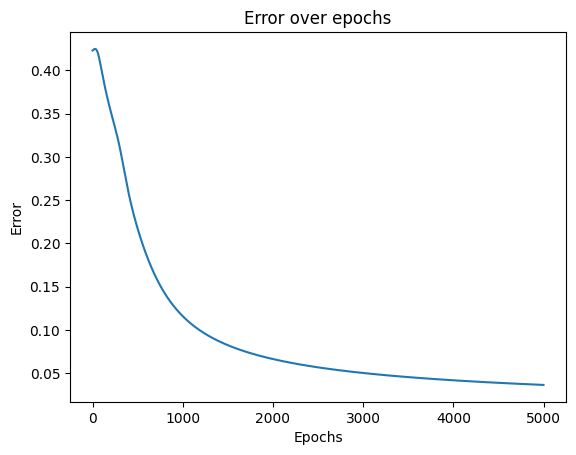

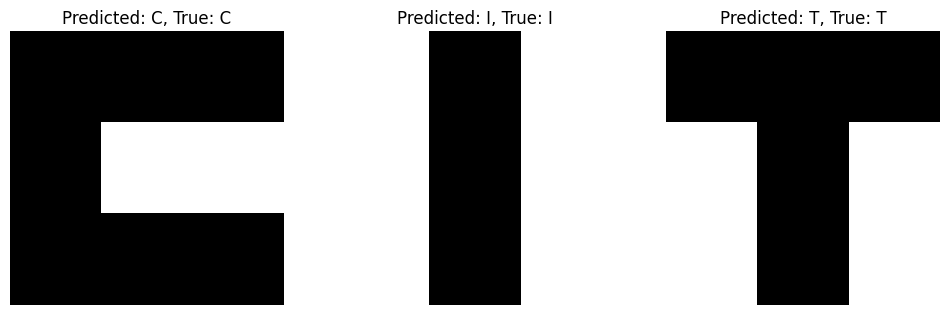

In [10]:
# Page72 例4.1（文字字符输入）代码实现
# 程序实际上是将文字字符放入3*3的方格上，根据字符各部分在方格上的映射进行量化，并将2维量化数据转换为展开成一串数字序列，可视化输出时进行了反向转换。

import numpy as np
import matplotlib.pyplot as plt

# 定义字符模式和对应标签
patterns = np.array([
    [1, 1, 1, 1, 0, 0, 1, 1, 1], # C
    [0, 1, 0, 0, 1, 0, 0, 1, 0], # I
    [1, 1, 1, 0, 1, 0, 0, 1, 0]  # T
])
labels = np.eye(3)  # one-hot编码标签

# 神经网络初始化
input_size = 9
hidden_size = 5
output_size = 3
learning_rate = 0.1
epochs = 5000

# 初始化权重和偏置
np.random.seed(0)
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# 激活函数及其导数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 前向传播
def forward_propagation(inputs, weights_ih, bias_h, weights_ho, bias_o):
    hidden_input = np.dot(inputs, weights_ih) + bias_h
    hidden_output = sigmoid(hidden_input)
    
    final_input = np.dot(hidden_output, weights_ho) + bias_o
    final_output = sigmoid(final_input)
    
    return hidden_output, final_output

# 后向传播
def backpropagation(inputs, hidden_output, final_output, targets, weights_ih, bias_h, weights_ho, bias_o):
    error = final_output - targets
    d_final_output = error * sigmoid_derivative(final_output)
    
    error_hidden = d_final_output.dot(weights_ho.T)
    d_hidden_output = error_hidden * sigmoid_derivative(hidden_output)
    
    # 更新权重和偏置
    weights_ho -= learning_rate * hidden_output.T.dot(d_final_output)
    bias_o -= learning_rate * np.sum(d_final_output, axis=0, keepdims=True)
    weights_ih -= learning_rate * inputs.T.dot(d_hidden_output)
    bias_h -= learning_rate * np.sum(d_hidden_output, axis=0, keepdims=True)

# 训练
errors = []
for epoch in range(epochs):
    _, final_output = forward_propagation(patterns, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
    errors.append(np.mean(np.abs(final_output - labels)))
    
    hidden_output, final_output = forward_propagation(patterns, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
    backpropagation(patterns, hidden_output, final_output, labels, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)

# 可视化误差下降曲线
plt.plot(errors)
plt.title('Error over epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# 创建字符映射
char_map = ['C', 'I', 'T']

# 测试
test_patterns = patterns[np.random.choice(len(patterns), size=3, replace=False)]  # 随机选择测试样本
_, test_outputs = forward_propagation(test_patterns, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
predicted_labels = np.argmax(test_outputs, axis=1)
true_labels = np.argmax(labels, axis=1)

# 可视化显示识别结果和识别标签
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(test_patterns[i].reshape(3, 3), cmap='gray_r')  # 使用 gray_r 以黑色显示字符
    ax.set_title(f'Predicted: {char_map[predicted_labels[i]]}, True: {char_map[true_labels[i]]}')
    ax.axis('off')
plt.show()

### 4.6 BP网络应用与设计实例

#### Page80 4.6.3 BP神经网络用于压缩、解压缩

文件夹 '/home/renhj/ann_test/test1' 已存在，未进行覆盖。
当前工作目录已切换到 '/home/renhj/ann_test/test1'。
Directory already exists: /home/renhj/ann_test/test1
Training the model or loading basic trained weights...


2025-01-29 11:32:20.322938: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-01-29 11:32:20.323249: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: renhj-XPS-15-9570
2025-01-29 11:32:20.323286: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: renhj-XPS-15-9570
2025-01-29 11:32:20.323661: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.183.1
2025-01-29 11:32:20.323759: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 535.183.1
2025-01-29 11:32:20.323785: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:248] kernel version seems to match DSO: 535.183.1


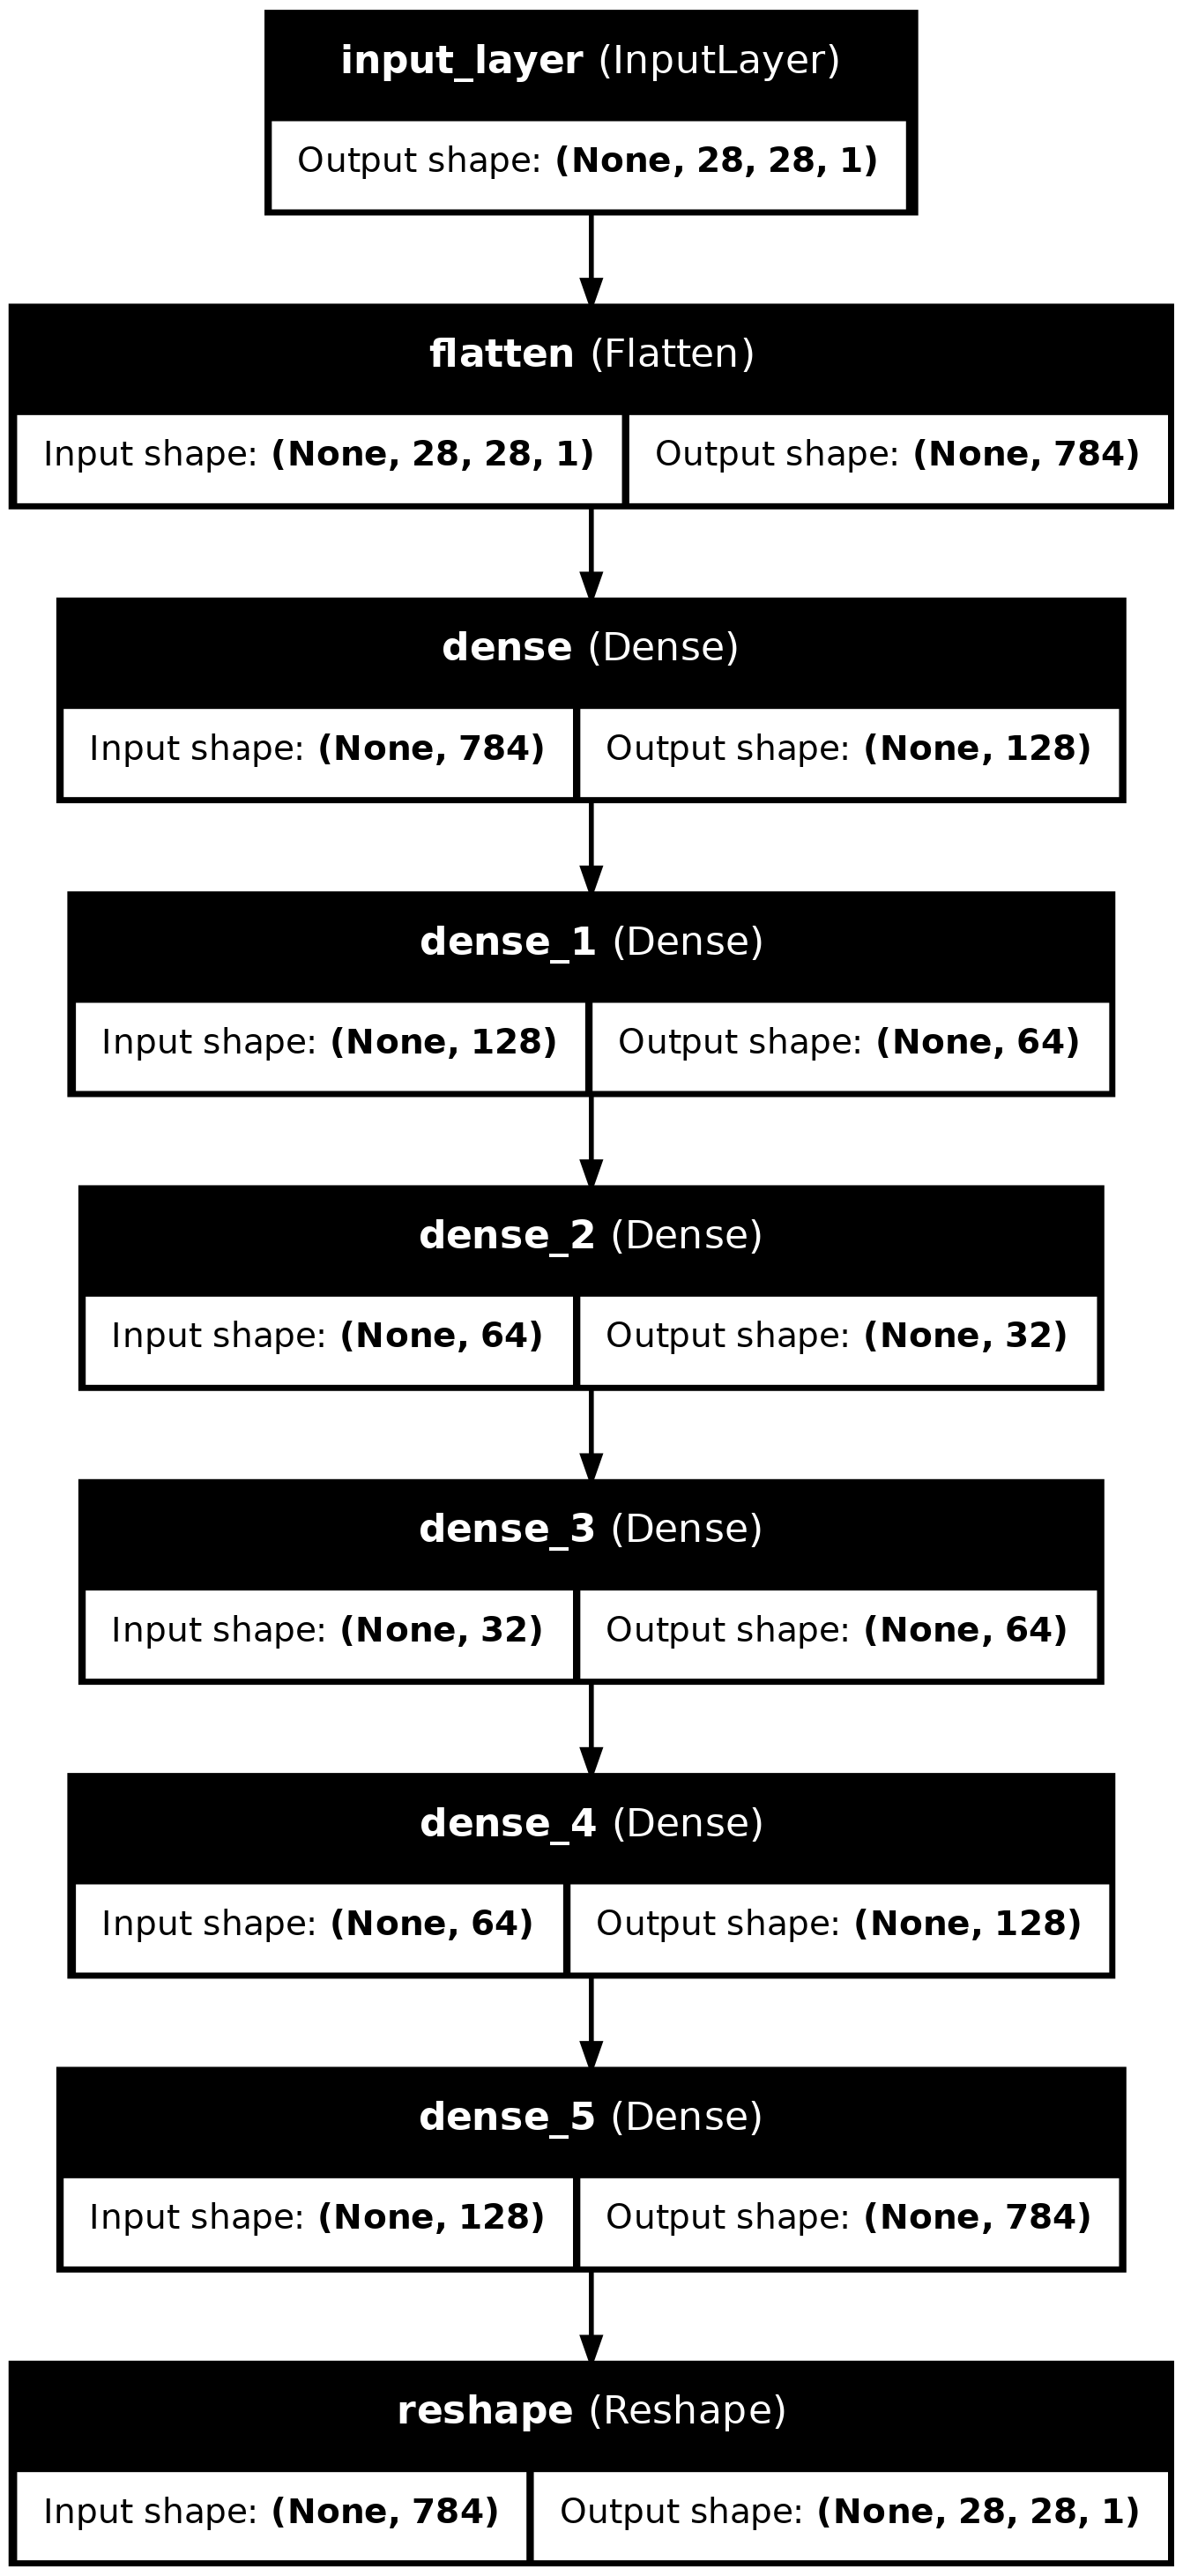

2025-01-29 11:32:21.166326: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50


2025-01-29 11:32:21.479416: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3408 - val_loss: 0.1651
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1575 - val_loss: 0.1367
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1344 - val_loss: 0.1242
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1242 - val_loss: 0.1171
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1168 - val_loss: 0.1114
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1118 - val_loss: 0.1081
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1086 - val_loss: 0.1051
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1058 - val_loss: 0.1028
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1037 - val_loss: 0.1018
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1019 - val_loss: 0.0997
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1006 - val_loss: 0.0983
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.

2025-01-29 11:33:27.983696: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50
 20/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2719

2025-01-29 11:33:28.310028: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1812 - val_loss: 0.1292
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1277 - val_loss: 0.1228
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1226 - val_loss: 0.1218
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1209 - val_loss: 0.1197
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1195 - val_loss: 0.1188
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1186 - val_loss: 0.1197
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1184 - val_loss: 0.1181
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1176 - val_loss: 0.1175
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1171 - val_loss: 0.1171
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1170 - val_loss: 0.1172
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1167 - val_loss: 0.1168
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.

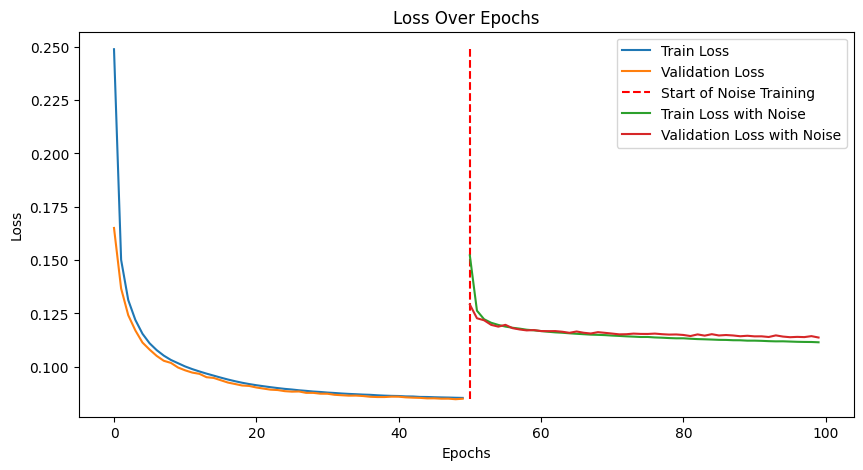

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


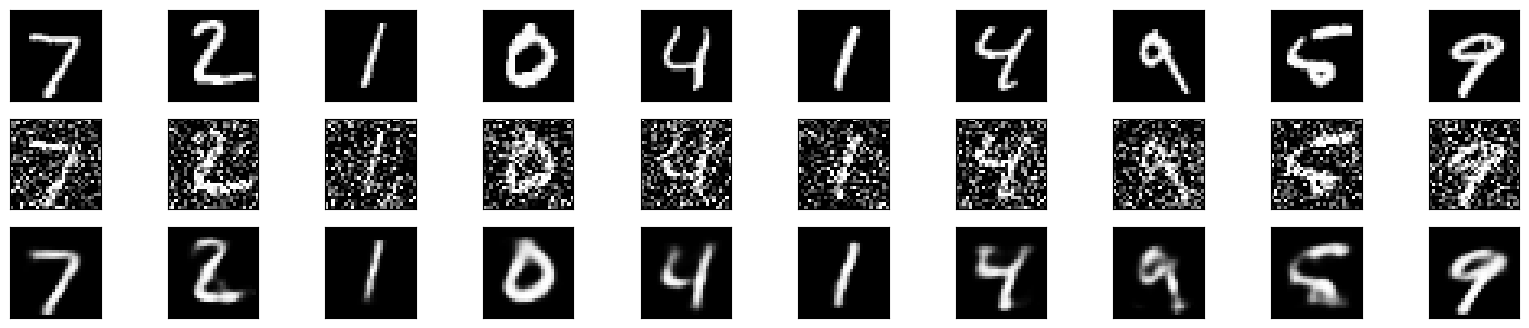

Visualization of original, noisy, and decoded images complete.


In [2]:
# 以压缩解压缩MNIST数据集为例，通过建立编码、解码能力，建立有噪声到无噪声输出，两阶段的训练演示BP网络用于压缩、解压缩的能力

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from IPython.display import display, Image
import tempfile
import os
from pathlib import Path

# 创建工作目录
def create_relative_path(folder_path):
    # 将路径中的 ~ 解析为用户的主目录
    expanded_path = os.path.expanduser(folder_path)
    
    # 将路径转换为Path对象，以便跨平台兼容
    path = Path(expanded_path)
    
    # 如果路径不存在，则创建多级目录
    if not path.exists():
        path.mkdir(parents=True, exist_ok=True)
        print(f"文件夹 '{expanded_path}' 已创建。")
    else:
        print(f"文件夹 '{expanded_path}' 已存在，未进行覆盖。")
    
    # 切换工作目录到新创建的文件夹
    os.chdir(path)
    print(f"当前工作目录已切换到 '{path}'。")

# 示例：创建相对路径文件夹，支持 ~
work_path = "~/ann_test/test1"
create_relative_path(work_path)

# 可防止误覆盖的工作路径生成函数
def ensure_directory_exists(directory_path):
    # 展开 ~ 符号为用户主目录的实际路径
    expanded_path = os.path.expanduser(directory_path)
    if not os.path.exists(expanded_path):
        os.makedirs(expanded_path)
        print(f"Directory created: {expanded_path}")
    else:
        print(f"Directory already exists: {expanded_path}")

# 创建默认的工作路径
ensure_directory_exists(work_path)
# 切换当前目录到本例指定文件夹
os.chdir(os.path.expanduser(work_path))

# 强制使用CPU（如果不需要GPU）
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# 定义权重保存路径
weights_dir = 'models'  # 创建一个目录用于保存模型权重
os.makedirs(weights_dir, exist_ok=True)  # 如果目录不存在，则创建它
weights_path = os.path.join(weights_dir, 'autoencoder_weights.weights.h5')  # 确保文件名以.weights.h5结尾
weights_path_with_noise = os.path.join(weights_dir, 'autoencoder_weights_with_noise.weights.h5')

# 检查是否已有保存的权重文件
if os.path.exists(weights_path_with_noise):
    print("Loading pre-trained weights with noise training...")
    train_model = False
else:
    print("Training the model or loading basic trained weights...")
    train_model = True

# 数据准备
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# 构建编码器-解码器模型
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
encoded = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Reshape((28, 28, 1))(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# 尝试网络结构可视化，并直接在notebook中显示
def visualize_model(model):
    with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
        plot_model(model, to_file=temp_file.name, show_shapes=True, show_layer_names=True)
        img = Image(filename=temp_file.name)
        display(img)
        os.unlink(temp_file.name)  # 删除临时文件

visualize_model(autoencoder)

def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

# 训练或加载预训练的权重
if train_model:
    if not os.path.exists(weights_path):
        # 第一阶段：无噪声编码-解码训练
        history = autoencoder.fit(x_train, x_train,
                                  epochs=50,
                                  batch_size=256,
                                  shuffle=True,
                                  validation_data=(x_test, x_test))

        # 保存第一阶段训练后的权重（不保存优化器状态）
        autoencoder.save_weights(weights_path)
        print(f"Saved first stage weights to {weights_path}")

    else:
        # 加载第一阶段预训练的权重
        autoencoder.load_weights(weights_path)
        print(f"Loaded first stage weights from {weights_path}")

    # 第二阶段：加入噪声训练
    # 添加噪声
    x_train_noisy = add_noise(x_train)
    x_test_noisy = add_noise(x_test)

    # 继续训练（如果需要）
    history_with_noise = autoencoder.fit(x_train_noisy, x_train,
                                         epochs=50,
                                         batch_size=256,
                                         shuffle=True,
                                         validation_data=(x_test_noisy, x_test))

    # 保存第二阶段训练后的权重（不保存优化器状态）
    autoencoder.save_weights(weights_path_with_noise)
    print(f"Saved second stage weights to {weights_path_with_noise}")

    # 可视化显示
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot([50]*2, [min(history.history['val_loss']), max(history.history['loss'])], 'r--', label='Start of Noise Training')
    plt.plot(list(range(50, 100)), history_with_noise.history['loss'], label='Train Loss with Noise')
    plt.plot(list(range(50, 100)), history_with_noise.history['val_loss'], label='Validation Loss with Noise')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
else:
    # 加载包含噪声训练的预训练权重
    autoencoder.load_weights(weights_path_with_noise)
    print(f"Loaded second stage weights from {weights_path_with_noise}")

# 确保无论是否训练，都有加噪声的测试集
if 'x_test_noisy' not in locals():
    x_test_noisy = add_noise(x_test)

# 显示图像对比
n = 10  # 显示多少个数字
plt.figure(figsize=(20, 4))
for i in range(n):
    # 原始图像
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 加噪声后的图像
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 解码后的图像
    ax = plt.subplot(3, n, i + 1 + 2*n)
    decoded_imgs = autoencoder.predict(x_test_noisy)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("Visualization of original, noisy, and decoded images complete.")

#### BP神经网络预测股票价格

2025-01-24 16:08:49.067865: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-24 16:08:49.728300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/50


2025-01-24 16:08:50.378614: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-24 16:08:51.721326: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0742 - val_loss: 0.0039
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - val_loss: 8.8776e-04
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - val_loss: 7.2424e-04
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 6.4126e-04
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 6.0870e-04
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 5.9709e-04
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 6.2540e-04
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 5.5818e-04
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 5.2786e-04
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

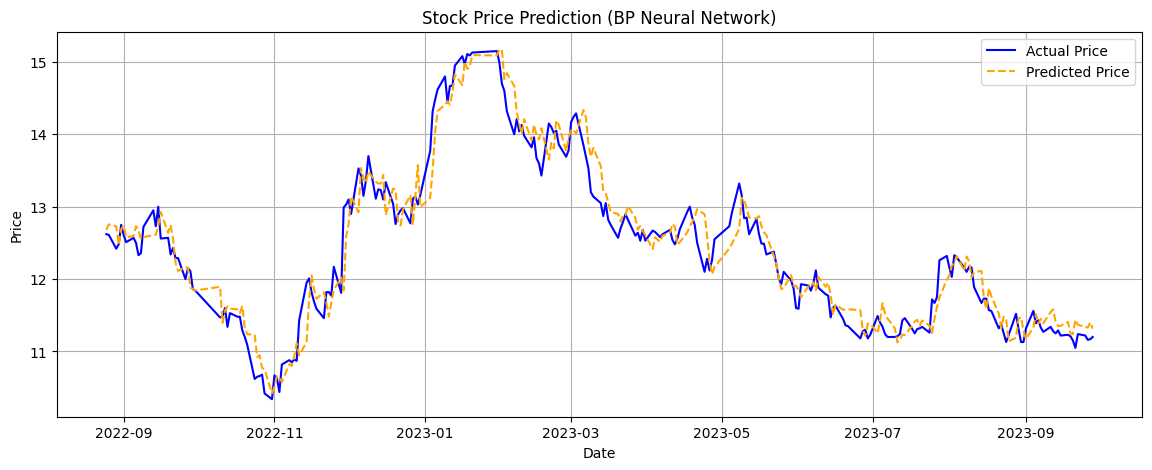

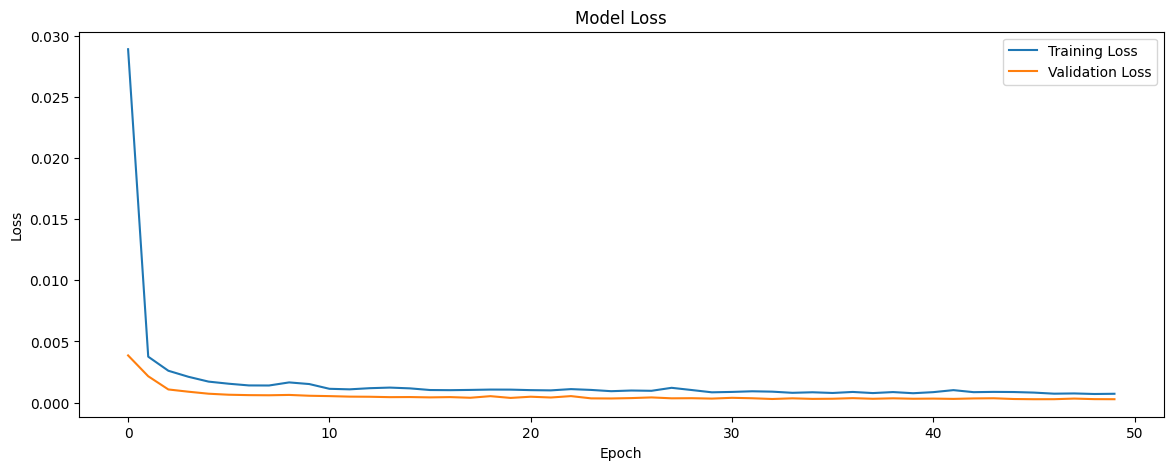

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tushare as ts

# Load data from Tushare
def load_data(ts_code, start_date, end_date):
    # 设置Tushare的Token
    ts.set_token('your token')  # 替换为您的Tushare Token
    pro = ts.pro_api()
    
    # 获取日线行情数据
    df = pro.daily(ts_code=ts_code, start_date=start_date, end_date=end_date)
    df['trade_date'] = pd.to_datetime(df['trade_date'])
    df.set_index('trade_date', inplace=True)
    df.sort_index(inplace=True)
    
    return df[['close']]  # 使用收盘价作为特征

# Preprocess data
def preprocess_data(data, time_step=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(time_step, len(scaled_data)):
        X.append(scaled_data[i-time_step:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    return X, y, scaler

# Build BP neural network
def build_bp_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))  # Define input shape using Input layer
    model.add(Dense(50, activation='relu'))  # First hidden layer
    model.add(Dense(25, activation='relu'))  # Second hidden layer
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Main program
if __name__ == "__main__":
    # Load data
    ts_code = '000001.SZ'  # 示例：平安银行股票代码
    start_date = '20180101'
    end_date = '20231001'
    data = load_data(ts_code, start_date, end_date)

    # Preprocess data
    time_step = 60
    X, y, scaler = preprocess_data(data, time_step)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Build model
    model = build_bp_model(X_train.shape[1])

    # Train model
    history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

    # Predict
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Visualize results
    plt.figure(figsize=(14, 5))
    plt.plot(data.index[-len(y_test):], y_test, label='Actual Price', color='blue')
    plt.plot(data.index[-len(y_test):], predictions, label='Predicted Price', linestyle='--', color='orange')
    plt.title('Stock Price Prediction (BP Neural Network)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Optionally, plot the training & validation loss over epochs
    plt.figure(figsize=(14, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

#### 采用BP神经网络，基于所选股票时间跨度区间相对跨度比例均线的分析、拟合、预测

2025-01-24 16:10:30.866062: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-24 16:10:31.508848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/50


2025-01-24 16:10:32.222545: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-24 16:10:32.265834: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1001 - val_loss: 0.0172
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0116
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0085
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - val_loss: 0.0068
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 - val_loss: 0.0060
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0059
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0055
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0053
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 0.0050
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0051
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0045


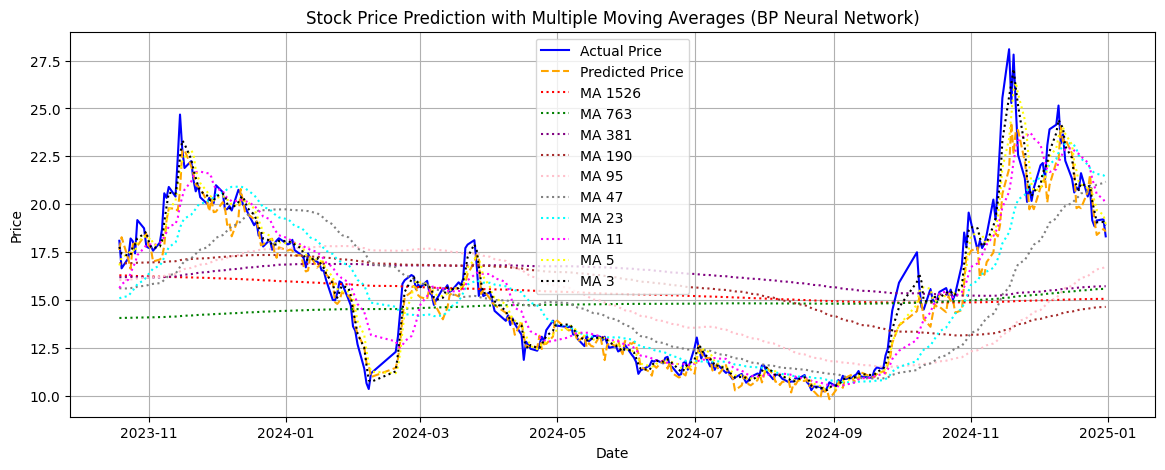

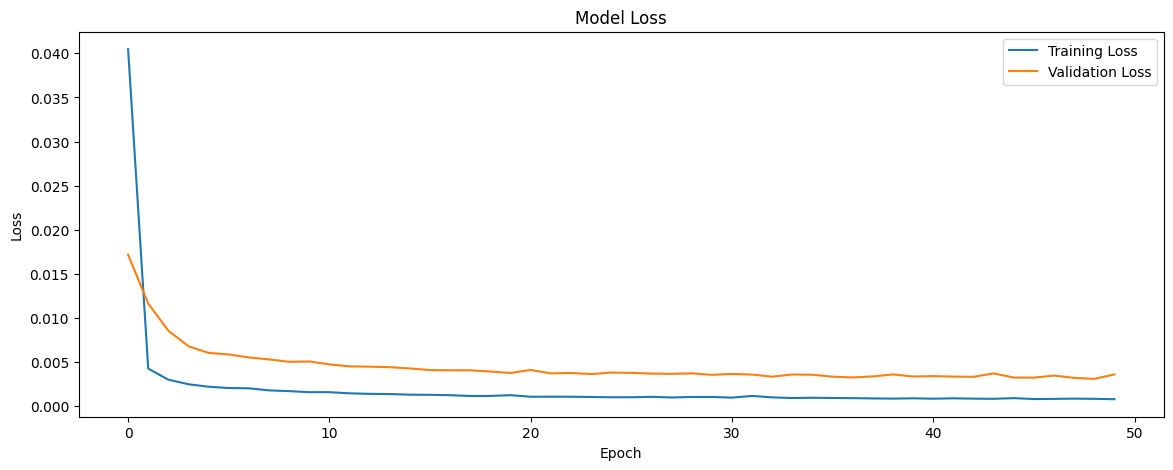

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tushare as ts

# Load data from Tushare
def load_data(ts_code, start_date, end_date):
    # 设置Tushare的Token
    ts.set_token('your token')  # 替换为您的Tushare Token
    pro = ts.pro_api()
    
    # 获取日线行情数据
    df = pro.daily(ts_code=ts_code, start_date=start_date, end_date=end_date)
    df['trade_date'] = pd.to_datetime(df['trade_date'])
    df.set_index('trade_date', inplace=True)
    df.sort_index(inplace=True)
    
    return df[['close']]  # 使用收盘价作为特征

# 计算并添加多个周期的移动平均线
def add_moving_averages(data):
    total_days = len(data)

    relative_periods = [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625]
    periods = []

    for ratio in relative_periods:
        period = max(int(total_days * ratio), 3)  # 最小不小于3天
        if period >= 3:
            periods.append(period)
        else:
            break

    for period in periods:
        col_name = f'MA_{period}'
        data[col_name] = data['close'].rolling(window=period).mean()
    return data, periods

# Preprocess data
def preprocess_data(data, time_step=60):
    data, periods = add_moving_averages(data)

    if periods:  # 检查是否至少有一个有效的周期
        max_period = max(periods)
        data.dropna(subset=[f'MA_{max_period}'], inplace=True)

        if len(data) <= time_step:
            raise ValueError(f"Not enough data points after dropping NaNs. Required: {time_step}, Available: {len(data)}")

        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(data[['close']])

        X, y = [], []
        for i in range(time_step, len(scaled_data)):
            X.append(scaled_data[i-time_step:i, 0])
            y.append(scaled_data[i, 0])
        X, y = np.array(X), np.array(y)

        # 用于绘图的日期索引，从time_step之后开始
        plot_date_index = data.index[time_step:]
        return X, y, scaler, plot_date_index, periods
    else:
        raise ValueError("No valid periods found to calculate moving averages.")

# Build BP neural network
def build_bp_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))  # Define input shape using Input layer
    model.add(Dense(50, activation='relu'))  # First hidden layer
    model.add(Dense(25, activation='relu'))  # Second hidden layer
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Main program
if __name__ == "__main__":
    # Load data
    ts_code = '002657.SZ'  # 示例：平安银行股票代码
    end_date = '20241231'
    start_date = '20120228'  # 增加历史数据的时间范围
    data = load_data(ts_code, start_date, end_date)

    # Preprocess data
    time_step = 60
    try:
        X, y, scaler, plot_date_index, periods = preprocess_data(data, time_step)
    except ValueError as e:
        print(e)
        exit()

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Build and Train model
    model = build_bp_model(X_train.shape[1])
    history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

    # Predict and inverse transform predictions and actual values
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Visualize results with MA lines
    plt.figure(figsize=(14, 5))
    plt.plot(plot_date_index[-len(y_test):], y_test, label='Actual Price', color='blue')
    plt.plot(plot_date_index[-len(y_test):], predictions, label='Predicted Price', linestyle='--', color='orange')

    # Plot moving averages using the same date index as predictions
    colors = ['red', 'green', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow', 'black']
    for idx, period in enumerate(periods):
        ma_series = data[f'MA_{period}'][time_step:]  # 确保移动平均线也从time_step之后开始
        # Ensure we use the same date index as the predictions
        plt.plot(plot_date_index[-len(y_test):], ma_series[-len(y_test):], label=f'MA {period}', linestyle=':', color=colors[idx % len(colors)])

    plt.title('Stock Price Prediction with Multiple Moving Averages (BP Neural Network)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Optionally, plot the training & validation loss over epochs
    plt.figure(figsize=(14, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

#### 使用Pytorch包实现的BP神经网络，可以保存、加载训练后权值。

文件夹 '/home/renhj/ann_test/test2' 已创建。
当前工作目录已切换到 '/home/renhj/ann_test/test2'。
Initial Weights:
fc1 weight: tensor([[ 0.3744, -0.0260],
        [-0.5446,  0.6042]])
fc1 bias: tensor([ 0.5349, -0.5826])
fc2 weight: tensor([[0.0140, 0.0810]])
fc2 bias: tensor([0.5272])
Epoch [500/1200], Loss: 0.0375
Epoch [1000/1200], Loss: 0.0085


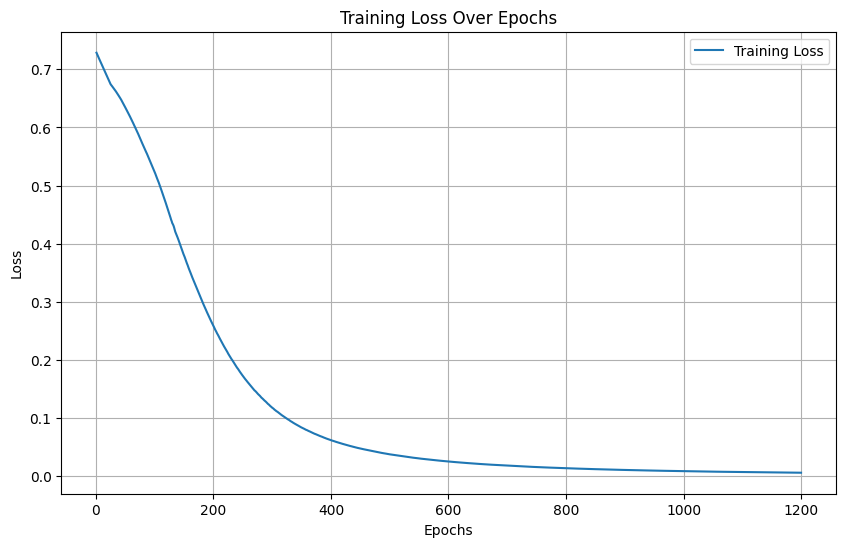

Weights saved to BP_model_weights.pth

Trained Weights:
fc1 weight: tensor([[-2.4040,  2.5290],
        [-4.2010,  4.2009]])
fc1 bias: tensor([ 2.4047e+00, -2.3983e-04])
fc2 weight: tensor([[-4.0398,  5.1358]])
fc2 bias: tensor([4.2958])
输入向量集：
 tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
实际输出 :
  tensor([[0.],
        [1.],
        [1.],
        [0.]])
期望输出 : 
 tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [3]:
# 延展，使用Pytorch包面向对象方式实现XOR问题程序，可训练、保存和加载训练后权值。
# Pytoch包广泛应用于多种流行预训练大模型的创建，更加接近实际使用。有助于理解现成包封装了的什么、作者封装的便利性考量，对比仅使用python代码，容易了解底层的实际实现。

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
from pathlib import Path

# 创建工作目录
def create_relative_path(folder_path):
    # 将路径中的 ~ 解析为用户的主目录
    expanded_path = os.path.expanduser(folder_path)
    
    # 将路径转换为Path对象，以便跨平台兼容
    path = Path(expanded_path)
    
    # 如果路径不存在，则创建多级目录
    if not path.exists():
        path.mkdir(parents=True, exist_ok=True)
        print(f"文件夹 '{expanded_path}' 已创建。")
    else:
        print(f"文件夹 '{expanded_path}' 已存在，未进行覆盖。")
    
    # 切换工作目录到新创建的文件夹
    os.chdir(path)
    print(f"当前工作目录已切换到 '{path}'。")

# 示例：创建相对路径文件夹，支持 ~
work_path = "~/ann_test/test2"
create_relative_path(work_path)

class Model(nn.Module):
    def __init__(self, input_size=2, hidden_size=2, output_size=1):
        super(Model, self).__init__()
        # 定义网络结构
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # 前向传播
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

    def train_model(self, X, Y, num_epochs=5000, learning_rate=0.01, tol=1e-5):
        # 损失函数和优化器
        criterion = nn.BCELoss()  # 二元交叉熵损失
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)

        losses = []

        for epoch in range(num_epochs):
            # 前向传播
            outputs = self(X)
            loss = criterion(outputs, Y)

            # 反向传播和优化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            losses.append(loss.item())

            if (epoch+1) % 500 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

            # 检查是否达到停止条件
            if loss.item() < tol:
                print(f'Training stopped at epoch {epoch+1} due to reaching tolerance level {tol:.4f}')
                break

        # 绘制损失变化图
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(losses) + 1), losses, label='Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Epochs')
        plt.legend()
        plt.grid(True)
        plt.show()

    def save_weights(self, path):
        torch.save(self.state_dict(), path)
        print(f"Weights saved to {path}")

    def load_weights(self, path):
        self.load_state_dict(torch.load(path, weights_only=True))
        print(f"Weights loaded from {path}")

# 数据准备
X = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
Y = torch.tensor([[0.], [1.], [1.], [0.]])

# 创建模型实例
model = Model() #不带参数时默认创建2输入、2个隐层神经元、1个输出层神经元的网络，可以指定各层神经元数量，但要注意与输入数据和期望数据一致。

# 打印初始权重
print("Initial Weights:")
print("fc1 weight:", model.fc1.weight.data)
print("fc1 bias:", model.fc1.bias.data)
print("fc2 weight:", model.fc2.weight.data)
print("fc2 bias:", model.fc2.bias.data)

# 如果已有训练得到的权重文件则加载，如果没有则进行训练并保存权重
weightsFile='BP_model_weights.pth'
if os.path.exists(weightsFile):
    # 加载权重
    model.load_weights(weightsFile)
else:
    # 训练模型
    model.train_model(X, Y, num_epochs=1200)
    # 保存权重
    model.save_weights(weightsFile)
    

# 打印训练或加载后的权重
print("\nTrained Weights:")
print("fc1 weight:", model.fc1.weight.data)
print("fc1 bias:", model.fc1.bias.data)
print("fc2 weight:", model.fc2.weight.data)
print("fc2 bias:", model.fc2.bias.data)

# 测试模型
with torch.no_grad():
    test_outputs = model.forward(X)
    predicted = (test_outputs > 0.5).float()
    print('输入向量集：\n',X)
    print('实际输出 :\n ', predicted)
    print('期望输出 : \n', Y)